Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import torch

Using Graphics Card 

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Importing Dataset

In [3]:

dataset = pd.read_csv('romanized_nepali_dataset.csv')

# Display first few rows
dataset.head()


,rating,label,Romanized Review
0,5,1.0,product Ramro xw
1,4,0.0,Yo earbuds le noise cancellation vaneko jastai...
2,5,1.0,steel jhos ko jasto kam nagarni rahicha. 1/2 t...
3,4,1.0,"Nice quality, 6 dekhi 60 kg samma raixa babal ..."
4,4,0.0,Size perfect fit bhayo ani comfort pani top cl...


Checking and Removing The Null values

In [4]:
# Check for null values
print(dataset.isnull().sum())

# Drop or fill missing data as necessary
dataset.dropna(inplace = True)

rating              3
label               4
Romanized Review    5
dtype: int64


In [5]:
#Counting how many reviews are real and how many are fake
count_label= dataset.value_counts('label')

In [6]:
count_label

label
1.0    2540
0.0    2411
Name: count, dtype: int64

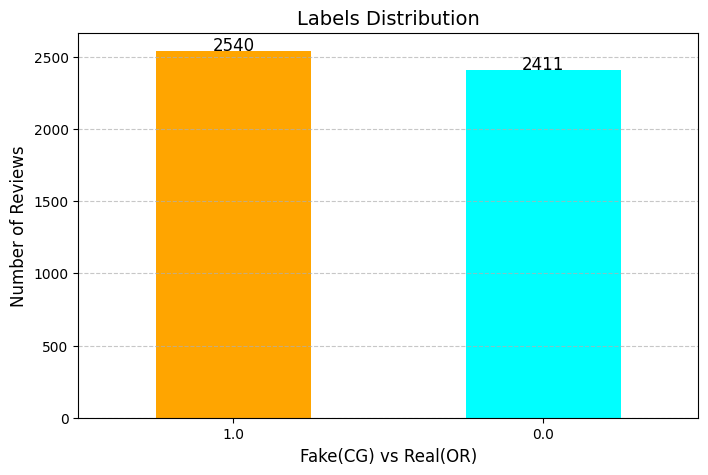

In [7]:
import matplotlib.pyplot as plt


count_label = pd.Series(count_label)

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = count_label.plot(kind='bar', color=['orange', 'cyan'])

# Add title and labels
plt.title("Labels Distribution", fontsize=14)
plt.xlabel("Fake(CG) vs Real(OR)", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Add numeric values on bars
for i, v in enumerate(count_label):
    ax.text(i, v + 3, str(v), ha='center', fontsize=12)

# Show the bar chart
plt.xticks(rotation=0)  # Keep category labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.show()

In [8]:
count= dataset.value_counts('rating')

In [9]:
count

rating
5    2733
4     996
3     510
1     386
2     326
Name: count, dtype: int64

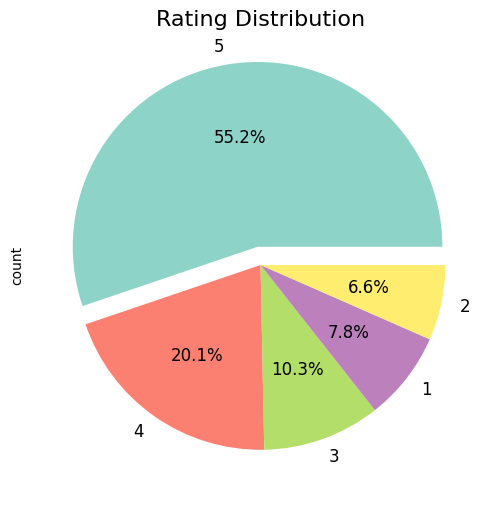

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

count.plot.pie(autopct ='%1.1f%%' , startangle= 0 , cmap= 'Set3', fontsize =12, explode = (0.1,0,0,0,0))

plt.title("Rating Distribution" , fontsize = 16)

plt.show()

Converting to lowercase

In [11]:
dataset['Romanized Review'] = dataset['Romanized Review'].str.lower()

In [12]:
dataset.tail()

,rating,label,Romanized Review
4951,3,0.0,"gaming ko lagi kinya, tara performance moderat..."
4952,3,1.0,thorai damage raixa aru ta sab thikxa
4953,2,0.0,product use garepaxi dherai asha gare jasto re...
4954,4,0.0,"tel le kapaal chamkilo vayo 💇‍♀️❤️, tara chip-..."
4955,5,0.0,the size is so big for me and i trying to but🥲


Converting emojis to their text equivalent

In [13]:
import emoji

def convert_emojis_to_text(text):
    return emoji.demojize(text, delimiters=(" ", " ")) 

dataset['text_'] = dataset['Romanized Review'].apply(convert_emojis_to_text)

In [14]:
dataset.tail()

,rating,label,Romanized Review,text_
4951,3,0.0,"gaming ko lagi kinya, tara performance moderat...","gaming ko lagi kinya, tara performance moderat..."
4952,3,1.0,thorai damage raixa aru ta sab thikxa,thorai damage raixa aru ta sab thikxa
4953,2,0.0,product use garepaxi dherai asha gare jasto re...,product use garepaxi dherai asha gare jasto re...
4954,4,0.0,"tel le kapaal chamkilo vayo 💇‍♀️❤️, tara chip-...",tel le kapaal chamkilo vayo woman_getting_hai...
4955,5,0.0,the size is so big for me and i trying to but🥲,the size is so big for me and i trying to but ...


Normalize the text

In [15]:
import re

def normalize_text(text):
    
    text = re.sub(r'\bu\b', 'timi', text)  
    text = re.sub(r'\bm\b', 'ma', text)
    text = re.sub(r'\beka\b', 'ek', text)

    # Remove extra spaces and normalize spacing
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [16]:
dataset['text_'] = dataset['text_'].apply(lambda X : normalize_text(X))

Removes noise from the dataset and only keep alphabets and spaces.

In [17]:
# Keep only alphabets and spaces

def remove_noise(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'nga', '', text)
     
    return text

dataset['text_'] = dataset['text_'].apply(lambda X: remove_noise(X))

In [18]:
dataset.tail()

,rating,label,Romanized Review,text_
4951,3,0.0,"gaming ko lagi kinya, tara performance moderat...",gaming ko lagi kinya tara performance moderate...
4952,3,1.0,thorai damage raixa aru ta sab thikxa,thorai damage raixa aru ta sab thikxa
4953,2,0.0,product use garepaxi dherai asha gare jasto re...,product use garepaxi dherai asha gare jasto re...
4954,4,0.0,"tel le kapaal chamkilo vayo 💇‍♀️❤️, tara chip-...",tel le kapaal chamkilo vayo womangettinghaircu...
4955,5,0.0,the size is so big for me and i trying to but🥲,the size is so big for me and i trying to but ...


In [19]:
dataset.drop('Romanized Review', axis =1)

,rating,label,text_
0,5,1.0,product ramro xw
1,4,0.0,yo earbuds le noise cancellation vaneko jastai...
2,5,1.0,steel jhos ko jasto kam nagarni rahicha time ...
3,4,1.0,nice quality dekhi kg samma raixa babal xa l...
4,4,0.0,size perfect fit bhayo ani comfort pani top cl...
...,...,...,...
4951,3,0.0,gaming ko lagi kinya tara performance moderate...
4952,3,1.0,thorai damage raixa aru ta sab thikxa
4953,2,0.0,product use garepaxi dherai asha gare jasto re...
4954,4,0.0,tel le kapaal chamkilo vayo womangettinghaircu...


Handle Slangs and common typing styles

In [20]:
# Step 3: Handling Slang (Manual slang replacements)
def handle_slang(text):
    slang_dict = {'thikkk': 'thik', 
        'ghamta': 'samta', 
        'farkera': 'pachhi',
        'xa': 'cha',
        'hoina': 'haina',
        'k': 'ke',
        'khoi': 'kahaan',
        'kati': 'kati',
        'k garne': 'ke garne',
        'thaxa': 'thaha',
        'thaxaina': 'thaha chaina',
        'kya': 'kya ho',
        'la': 'la',
        'hait': 'hait',
        'dherai': 'dherai',
        'ali': 'ali',
        'kasto': 'kasto',
        'k cha': 'ke cha',
        'kura': 'kura',
        'khate': 'khate',
        'dai': 'dai',
        'didi': 'didi',
        'bhai': 'bhai',
        'bahini': 'bahini',
        'kukurrr': 'kukur',
        'jastooo': 'jasto',
        'testooo': 'testo',
        'thank uh':'thank you',
        'yesto': 'yesto',
        'kinaaaa': 'kina',
        'hunchaaaa': 'huncha',
        'hunnaa': 'hunna',
        'pugyooo': 'pugyo',
        'pugenaaa': 'pugena',
        'khaana': 'khaana',
        'khayo': 'khayo',
        'khana': 'khana',
        'bas': 'bas',
        'chhito': 'chhito',
        'bholi': 'bholi',
        'aaja': 'aaja',
        'parla': 'parla',
        'pardaina': 'pardaina',
        'thik': 'thik',
        'thikai': 'thikai',
        'ramro': 'ramro',
        'naramro': 'naramro',
        'khatra': 'khatra',
        'halka': 'halka',
        'maile': 'maile',
        'timi': 'timi',
        'huss': 'huss',
        'guff': 'guff',
        'jhyau': 'jhyau',
        'khuro': 'khuro',
        'thulo': 'thulo',
        'sano': 'sano',
        'khaire': 'khaire',
        'jholeyy': 'jholey',
        'fuchhey': 'fuchhey',
        'khatey': 'khatey',
        'boka': 'boka',
        'bokey': 'bokey',
        'bokeycha': 'bokeycha',
        'bokeko': 'bokeko',
        'bokera': 'bokera',
        'bokne': 'bokne',
        'boknu': 'boknu',
        'boknus': 'boknus',
        'boknuparne': 'boknuparne',
        'boknuparyo': 'boknuparyo',
        'boknuparcha': 'boknuparcha',
        'xa' : 'cha',
        'khai': 'malai tha xaina',
        'gr8': 'great',
        'bro': 'bhai',
        'thik xa': 'thik cha',
        'k xa': 'k cha',
        'ke cha' :'k cha',
        'momo': 'dumpling',
    }
    for slang, standard in slang_dict.items():
        text = text.replace(slang, standard)
    return text

dataset['text_'] = dataset['text_'].apply(lambda X : handle_slang(X))


Remove Stopwords using custom dictionary

In [21]:
# Step 4: Stopword Removal (Example list of Nepali stopwords)
stopwords = ['ra', 'ko', 'le', 'lai', 'bata', 'xa', 'yo', 'tiyo', 'mero', 'maile', 'ma', 'lagi', 'mana', 'malai', 'ho', 'tara', 'pani', 'chan', 'garna', 'hunxa', 'of', 'a', 'an', 'the', 'is', 'and', 'but' ]
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text


dataset['text_'] = dataset['text_'].apply(lambda X : remove_stopwords(X))

In [22]:
dataset.tail()

,rating,label,Romanized Review,text_
4951,3,0.0,"gaming ko lagi kinya, tara performance moderat...",gaming keo keinya performance moderate jasto l...
4952,3,1.0,thorai damage raixa aru ta sab thikxa,thorai damage raicha aru ta sab thikecha
4953,2,0.0,product use garepaxi dherai asha gare jasto re...,product use garepaxi dherai asha gare jasto re...
4954,4,0.0,"tel le kapaal chamkilo vayo 💇‍♀️❤️, tara chip-...",tel keapaal chamkeilo vayo womangettinghaircut...
4955,5,0.0,the size is so big for me and i trying to but🥲,size so big for me i trying to smilingfacewith...


Tokenize the text 

In [23]:
def tokenize(text):
    return text.split()

dataset['text_'] = dataset['text_'].apply(lambda X : tokenize(X))

dataset.head()

,rating,label,Romanized Review,text_
0,5,1.0,product ramro xw,"[product, ramro, xw]"
1,4,0.0,yo earbuds le noise cancellation vaneko jastai...,"[earbuds, noise, cancellation, vanekeo, jastai..."
2,5,1.0,steel jhos ko jasto kam nagarni rahicha. 1/2 t...,"[steel, jhos, keo, jasto, keam, nagarni, rahic..."
3,4,1.0,"nice quality, 6 dekhi 60 kg samma raixa babal ...","[nice, quality, dekehi, keg, samma, raicha, ba..."
4,4,0.0,size perfect fit bhayo ani comfort pani top cl...,"[size, perfect, fit, bhayo, ani, comfort, top,..."


Create a custom lemmatization dictionary and perform lemmatization

In [24]:
import re

# Step 1: Define the Lemmatizer Dictionary for common words and their lemma
lemmatizer_dict = {
    'gardaichha': 'garnu',
    'garchha': 'garnu',
    'garera': 'garnu',
    'garne': 'garnu',
    'bhayeko': 'bhayeko',
    'jane': 'jan',
    'huncha': 'hunu',
    'hune': 'hunu',
    'pugne': 'pugnu',
    'garne': 'garnu',
    'chha': 'cha',
    'aune': 'aunu',
    'jane': 'jan',
    'dekhe': 'dekhnus',
    'garaune': 'garnu',
    'jaane': 'jan'
}

# Step 2: Regular Expression-based Lemmatization
def lemmatize(text):
    # Ensure the text is a string
    if isinstance(text, list):
        text = ' '.join(text)  # If the input is a list, join it into a single string

    # Step 2.1: Check against the lemmatizer dictionary
    words = text.split()
    lemmatized_words = []

    for word in words:
        # If the word is in the lemmatizer dictionary, replace it with the lemma
        if word in lemmatizer_dict:
            lemmatized_words.append(lemmatizer_dict[word])
        else:
            lemmatized_words.append(word)  # If no lemma exists, keep the original word

    # Step 2.2: Return the lemmatized version
    return ' '.join(lemmatized_words)

# Now apply lemmatize to your text column
dataset['processed_review'] = dataset['text_'].apply(lambda X: lemmatize(X))

In [25]:
dataset.head()

,rating,label,Romanized Review,text_,processed_review
0,5,1.0,product ramro xw,"[product, ramro, xw]",product ramro xw
1,4,0.0,yo earbuds le noise cancellation vaneko jastai...,"[earbuds, noise, cancellation, vanekeo, jastai...",earbuds noise cancellation vanekeo jastai garc...
2,5,1.0,steel jhos ko jasto kam nagarni rahicha. 1/2 t...,"[steel, jhos, keo, jasto, keam, nagarni, rahic...",steel jhos keo jasto keam nagarni rahicha time...
3,4,1.0,"nice quality, 6 dekhi 60 kg samma raixa babal ...","[nice, quality, dekehi, keg, samma, raicha, ba...",nice quality dekehi keg samma raicha babal cha...
4,4,0.0,size perfect fit bhayo ani comfort pani top cl...,"[size, perfect, fit, bhayo, ani, comfort, top,...",size perfect fit bhayo ani comfort top class w...


Split dataset text and rating into training and testing sets

In [26]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(dataset["processed_review"], dataset["label"], test_size=0.2, random_state=42, stratify=dataset["label"])

TFIDF Vectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [28]:
X_train_tfidf

<3960x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 112357 stored elements in Compressed Sparse Row format>

Word2Vec 

In [29]:
# Word2Vec Embedding

from gensim.models import Word2Vec

sentences = [text.split() for text in X_train]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

def average_word2vec(text):
    words = text.split()
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(vectors) == 0:
        return np.zeros(100)  # Zero vector if no words match
    return np.mean(vectors, axis=0)

X_train_w2v = np.array([average_word2vec(text) for text in X_train])
X_test_w2v = np.array([average_word2vec(text) for text in X_test])

In [30]:
X_train_w2v

array([[-0.1006986 ,  0.3498196 ,  0.07283095, ..., -0.57880723,
         0.21022505,  0.06460913],
       [-0.29812735,  0.5083257 ,  0.02364744, ..., -0.65014654,
         0.25834522,  0.05589619],
       [-0.24185485,  0.39971381,  0.03514061, ..., -0.57490206,
         0.18333282,  0.06883209],
       ...,
       [-0.44020748,  0.52292424,  0.22813195, ..., -0.78743237,
         0.30392233, -0.03155005],
       [-0.30861008,  0.44699344,  0.08525875, ..., -0.65885842,
         0.2428854 ,  0.06442632],
       [-0.21964742,  0.43437231,  0.21437228, ..., -0.7944091 ,
         0.36851978,  0.17533322]])

Load and Use Pretrained Fasttext Model

In [31]:
#Load Pretrained FastText Model

import fasttext
import fasttext.util

fasttext.util.download_model('ne', if_exists='ignore')  # Download Nepali FastText model
ft_model = fasttext.load_model('cc.ne.300.bin')  # Load model

def average_fasttext(text):
    words = text.split()
    vectors = [ft_model.get_word_vector(word) for word in words if word in ft_model.words]
    if len(vectors) == 0:
        return np.zeros(300)  # Zero vector if no words match
    return np.mean(vectors, axis=0)

X_train_ft = np.array([average_fasttext(text) for text in X_train])
X_test_ft = np.array([average_fasttext(text) for text in X_test])

In [32]:
X_train_ft

array([[-1.16694327e-02,  1.35661131e-02, -7.91270193e-03, ...,
        -7.53782503e-03,  3.98035627e-03, -8.84019677e-03],
       [-2.99382576e-04,  2.25522965e-02, -8.17909930e-03, ...,
        -5.66467689e-03, -2.85116653e-03, -1.72744512e-05],
       [-1.67509876e-02,  3.26057859e-02, -1.43438084e-02, ...,
        -2.34703952e-03, -2.18979903e-02, -7.05681276e-04],
       ...,
       [-3.63101019e-03,  1.65467206e-02, -4.35682200e-03, ...,
         2.33883993e-03, -4.62530367e-03, -7.33795925e-04],
       [-4.91617899e-03,  1.99237596e-02, -1.08222738e-02, ...,
        -6.38176873e-03,  4.94577363e-03, -2.51867133e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Use hstack to combine TFIDF , Word2Vec and Fasttext

In [33]:
from scipy.sparse import hstack

# Combine TF-IDF, Word2Vec, and FastText Features
X_train_combined = hstack([X_train_tfidf, X_train_w2v, X_train_ft])
X_test_combined = hstack([X_test_tfidf, X_test_w2v, X_test_ft])

In [34]:
X_train_combined

<3960x5400 sparse matrix of type '<class 'numpy.float64'>'
	with 1679957 stored elements in COOrdinate format>

Train a SVM Model

Accuracy: 0.8204

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       483
         1.0       0.84      0.81      0.82       508

    accuracy                           0.82       991
   macro avg       0.82      0.82      0.82       991
weighted avg       0.82      0.82      0.82       991



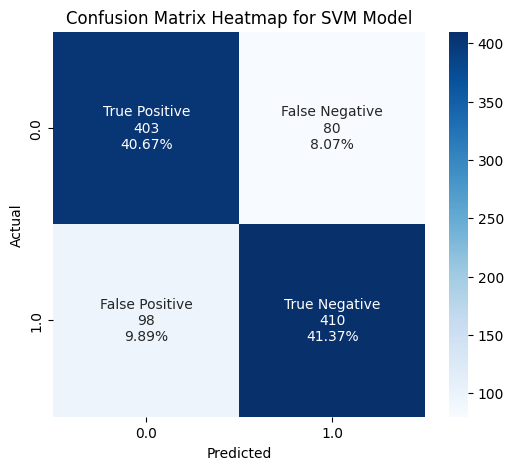

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Train the SVM model
svm_model = SVC(kernel="linear", class_weight="balanced", probability=True)
svm_model.fit(X_train_combined, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_combined)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix (raw and normalized)
cm_raw = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='all')  # Normalize over total samples

# Get the unique class labels
class_names = sorted(list(set(y_test)))

# Create a formatted annotation matrix (combine raw and percentage values)
labels = np.array([[f"True Positive\n{cm_raw[0,0]}\n{cm_norm[0,0]*100:.2f}%",
                    f"False Negative\n{cm_raw[0,1]}\n{cm_norm[0,1]*100:.2f}%"],
                   [f"False Positive\n{cm_raw[1,0]}\n{cm_norm[1,0]*100:.2f}%",
                    f"True Negative\n{cm_raw[1,1]}\n{cm_norm[1,1]*100:.2f}%"]])

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_raw, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for SVM Model')
plt.show()

Evaluate the SVM Model

Train Using Random Forrest Classifier

Accuracy: 0.7164

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72       483
         1.0       0.75      0.67      0.71       508

    accuracy                           0.72       991
   macro avg       0.72      0.72      0.72       991
weighted avg       0.72      0.72      0.72       991



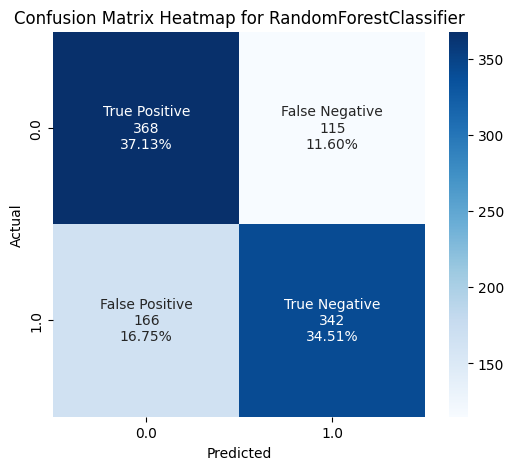

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Train the RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_combined)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix (raw and normalized)
cm_raw = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='all')  # Normalize over total samples

# Get the unique class labels
class_names = sorted(list(set(y_test)))

# Create a formatted annotation matrix (combine raw and percentage values)
labels = np.array([[f"True Positive\n{cm_raw[0,0]}\n{cm_norm[0,0]*100:.2f}%",
                    f"False Negative\n{cm_raw[0,1]}\n{cm_norm[0,1]*100:.2f}%"],
                   [f"False Positive\n{cm_raw[1,0]}\n{cm_norm[1,0]*100:.2f}%",
                    f"True Negative\n{cm_raw[1,1]}\n{cm_norm[1,1]*100:.2f}%"]])

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_raw, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for RandomForestClassifier')
plt.show()

Train Using Logistic Regression Model

Accuracy: 0.7982

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79       483
         1.0       0.80      0.81      0.80       508

    accuracy                           0.80       991
   macro avg       0.80      0.80      0.80       991
weighted avg       0.80      0.80      0.80       991



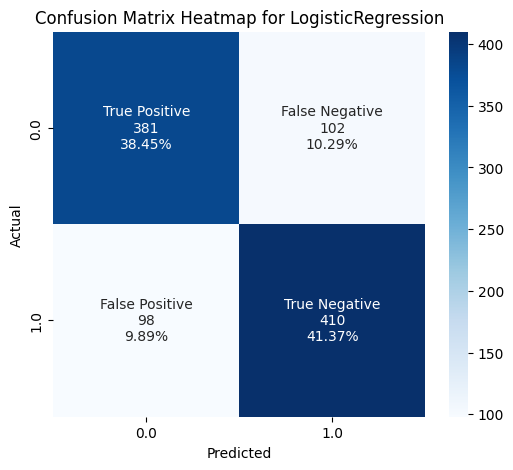

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Train the LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_combined, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_combined)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix (raw and normalized)
cm_raw = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='all')  # Normalize over total samples

# Get the unique class labels
class_names = sorted(list(set(y_test)))

# Create a formatted annotation matrix (combine raw and percentage values)
labels = np.array([[f"True Positive\n{cm_raw[0,0]}\n{cm_norm[0,0]*100:.2f}%",
                    f"False Negative\n{cm_raw[0,1]}\n{cm_norm[0,1]*100:.2f}%"],
                   [f"False Positive\n{cm_raw[1,0]}\n{cm_norm[1,0]*100:.2f}%",
                    f"True Negative\n{cm_raw[1,1]}\n{cm_norm[1,1]*100:.2f}%"]])

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_raw, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for LogisticRegression')
plt.show()

Accuracy for sklearn LinearSVC: 0.8133198789101918
Classification Report for sklearn LinearSVC:
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       483
         1.0       0.83      0.80      0.81       508

    accuracy                           0.81       991
   macro avg       0.81      0.81      0.81       991
weighted avg       0.81      0.81      0.81       991



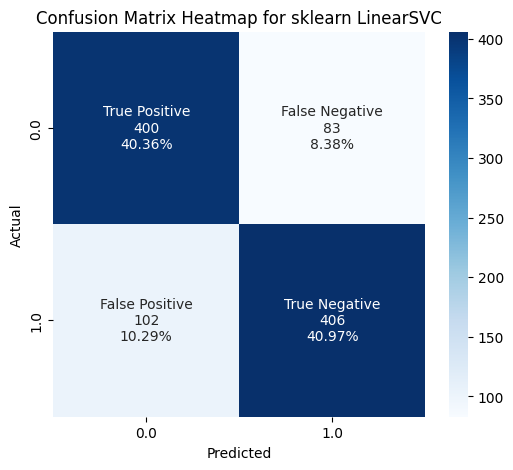

In [38]:
# from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Instantiate the SVM svm_skl_model
svm_skl_model = LinearSVC(dual=False, max_iter=100000)
# svm_skl_model = SVC(kernel = 'linear', max_iter = 1000)#, cache_size = 300)

# Fit the svm_skl_model to the training data
# Note: Ensure that 'y_train' is in a compatible shape (1D array)
svm_skl_model.fit(X_train_combined, y_train)

# Make predictions on the test set
predictions = svm_skl_model.predict(X_test_combined)

# Evaluate the svm_skl_model
from sklearn.metrics import accuracy_score, classification_report #, ConfusionMatrixDisplay

svm_skl_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy for sklearn LinearSVC: {svm_skl_accuracy}")
print("Classification Report for sklearn LinearSVC:")
print(classification_report(y_test, predictions))

# Compute and display confusion matrix
# ConfusionMatrixDisplay.from_predictions(y_test, predictions)

from sklearn.metrics import confusion_matrix

# Generate the confusion matrix (raw and normalized)
cm_raw = confusion_matrix(y_test, predictions)
cm_norm = confusion_matrix(y_test, predictions, normalize='all')  # Normalize over total samples

# Get the unique class labels
class_names = sorted(list(set(y_test)))

# Create a formatted annotation matrix (combine raw and percentage values)
labels = np.array([[f"True Positive\n{cm_raw[0,0]}\n{cm_norm[0,0]*100:.2f}%",
                     f"False Negative\n{cm_raw[0,1]}\n{cm_norm[0,1]*100:.2f}%"],
                   [f"False Positive\n{cm_raw[1,0]}\n{cm_norm[1,0]*100:.2f}%",
                     f"True Negative\n{cm_raw[1,1]}\n{cm_norm[1,1]*100:.2f}%"]])

# Create a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_raw, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for sklearn LinearSVC')
plt.show()

Saving the pretrained model using Joblib

In [ ]:
import joblib

# Save other models as before
joblib.dump(svm_model, "roman_svm_model.pkl")
joblib.dump(tfidf_vectorizer, "roman_tfidf_vectorizer.pkl")
joblib.dump(word2vec_model, "roman_word2vec_model.pkl")
joblib.dump(rf_model, "roman_rf_model.pkl")
joblib.dump(lr_model, "roman_lr_model.pkl")

# Save FastText Model Separately
ft_model.save_model("roman_fasttext_model.bin")

print("All models saved successfully!")